In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Datasets/indoorCVPR_09.tar /content

In [ ]:
!tar -xf indoorCVPR_09.tar

In [ ]:
import os
import shutil
import random

# Set random seed for reproducibility
random.seed(42)
split_ratio = 0.8

# Define source and destination directories
source_dir = '/content/Images'
train_dir = '/content/data/train'
test_dir = '/content/data/test'

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through each subdirectory (class) in the source directory
for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)

    # Skip if it's not a directory
    if not os.path.isdir(class_dir):
        continue

    # Create corresponding directories in train and test
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Get all image files in the class directory
    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Shuffle the images
    random.shuffle(images)

    # Calculate the split index
    split_index = int(split_ratio * len(images))

    # Split and move images
    for i, image in enumerate(images):
        src_path = os.path.join(class_dir, image)
        if i < split_index:
            dst_path = os.path.join(train_class_dir, image)
        else:
            dst_path = os.path.join(test_class_dir, image)
        shutil.copy2(src_path, dst_path)  # Use copy2 to preserve metadata

    print(f"Processed {class_name}: {split_index} images to train, {len(images) - split_index} images to test")

print("Dataset splitting completed!")

Processed gameroom: 101 images to train, 26 images to test
Processed jewelleryshop: 125 images to train, 32 images to test
Processed greenhouse: 80 images to train, 21 images to test
Processed videostore: 88 images to train, 22 images to test
Processed bedroom: 529 images to train, 133 images to test
Processed subway: 431 images to train, 108 images to test
Processed florist: 82 images to train, 21 images to test
Processed classroom: 90 images to train, 23 images to test
Processed dining_room: 219 images to train, 55 images to test
Processed poolinside: 139 images to train, 35 images to test
Processed computerroom: 91 images to train, 23 images to test
Processed meeting_room: 186 images to train, 47 images to test
Processed toystore: 277 images to train, 70 images to test
Processed garage: 82 images to train, 21 images to test
Processed airport_inside: 486 images to train, 122 images to test
Processed kitchen: 587 images to train, 147 images to test
Processed bar: 483 images to train, 

In [ ]:
train_dir = os.path.join('/content/data', "train")
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
classes.sort()
class_to_idx = {classes[i]: i for i in range(len(classes))}
idx_to_class = {i: classes[i] for i in range(len(classes))}

In [ ]:
classes

['airport_inside',
 'artstudio',
 'auditorium',
 'bakery',
 'bar',
 'bathroom',
 'bedroom',
 'bookstore',
 'bowling',
 'buffet',
 'casino',
 'children_room',
 'church_inside',
 'classroom',
 'cloister',
 'closet',
 'clothingstore',
 'computerroom',
 'concert_hall',
 'corridor',
 'deli',
 'dentaloffice',
 'dining_room',
 'elevator',
 'fastfood_restaurant',
 'florist',
 'gameroom',
 'garage',
 'greenhouse',
 'grocerystore',
 'gym',
 'hairsalon',
 'hospitalroom',
 'inside_bus',
 'inside_subway',
 'jewelleryshop',
 'kindergarden',
 'kitchen',
 'laboratorywet',
 'laundromat',
 'library',
 'livingroom',
 'lobby',
 'locker_room',
 'mall',
 'meeting_room',
 'movietheater',
 'museum',
 'nursery',
 'office',
 'operating_room',
 'pantry',
 'poolinside',
 'prisoncell',
 'restaurant',
 'restaurant_kitchen',
 'shoeshop',
 'stairscase',
 'studiomusic',
 'subway',
 'toystore',
 'trainstation',
 'tv_studio',
 'videostore',
 'waitingroom',
 'warehouse',
 'winecellar']

In [ ]:
import torch

In [ ]:
model2=torch.load('model2withlrcutmix.pth' , map_location=torch.device('cpu'))

<ipython-input-29-6dae46564f4c>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2=torch.load('model2withlrcutmix.pth' , map_location=torch.device('cpu'))


# Model Export and Inference Optimization

## Installing required libraries

In [ ]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 50.3 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime-gpu onnx onnxconverter_common==1.8.1 pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.2 MB/s eta 0:00:00


## Import required libraries

In [ ]:
import numpy as np    # we're going to use numpy to process input and output data
import onnxruntime    # to inference ONNX models, we use the ONNX Runtime
import onnx
from onnx import numpy_helper
import urllib.request
import json
import time

# display images in notebook
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

%matplotlib inline

## Export Model to onnx

In [ ]:
import onnx

onnx_model = onnx.load("resnet50dindoorcvpr.onnx")
onnx.checker.check_model(onnx_model)

## Load and check onnx model

In [ ]:
onnx_model = onnx.load("resnet50dindoorcvpr.onnx")

In [ ]:
onnx.checker.check_model(onnx_model)

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')  # CUDA GPU
elif torch.backends.mps.is_available():
    device = torch.device('mps') #Apple GPU
else:
    device = torch.device("cpu")

In [ ]:
x = torch.rand(8,3,224,224)
if device == 'cuda':
    x=x.to(device)
traced_model=torch.jit.trace(model2, x)

In [ ]:
traced_output=traced_model(torch.rand(8,3,224,224).to(device))
traced_output.shape

torch.Size([8, 67])

## Downloading Imagenette labels and model

## Inference using ONNX Runtime

In [ ]:
# Run the model on the backend
session = onnxruntime.InferenceSession('resnet50dindoorcvpr.onnx', None)

# get the name of the first input of the model
input_name = session.get_inputs()[0].name

print('Input Name:', input_name)

Input Name: input


## Classify sample images using our inference session

In [ ]:
def load_labels(path):
    with open(path) as f:
        data = json.load(f)
    return np.asarray(data)

def preprocess(input_data):
    # convert the input data into the float32 input
    img_data = input_data.astype('float32')

    #normalize
    mean_vec = np.array([0.485, 0.456, 0.406])
    stddev_vec = np.array([0.229, 0.224, 0.225])
    norm_img_data = np.zeros(img_data.shape).astype('float32')
    for i in range(img_data.shape[0]):
        norm_img_data[i,:,:] = (img_data[i,:,:]/255 - mean_vec[i]) / stddev_vec[i]

    #add batch channel
    norm_img_data = norm_img_data.reshape(1, 3, 224, 224).astype('float32')
    return norm_img_data

def softmax(x):
    x = x.reshape(-1)
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def postprocess(result):
    return softmax(np.array(result)).tolist()

In [ ]:
filename = '/content/livingroom.jpg'
input_image = Image.open(filename)

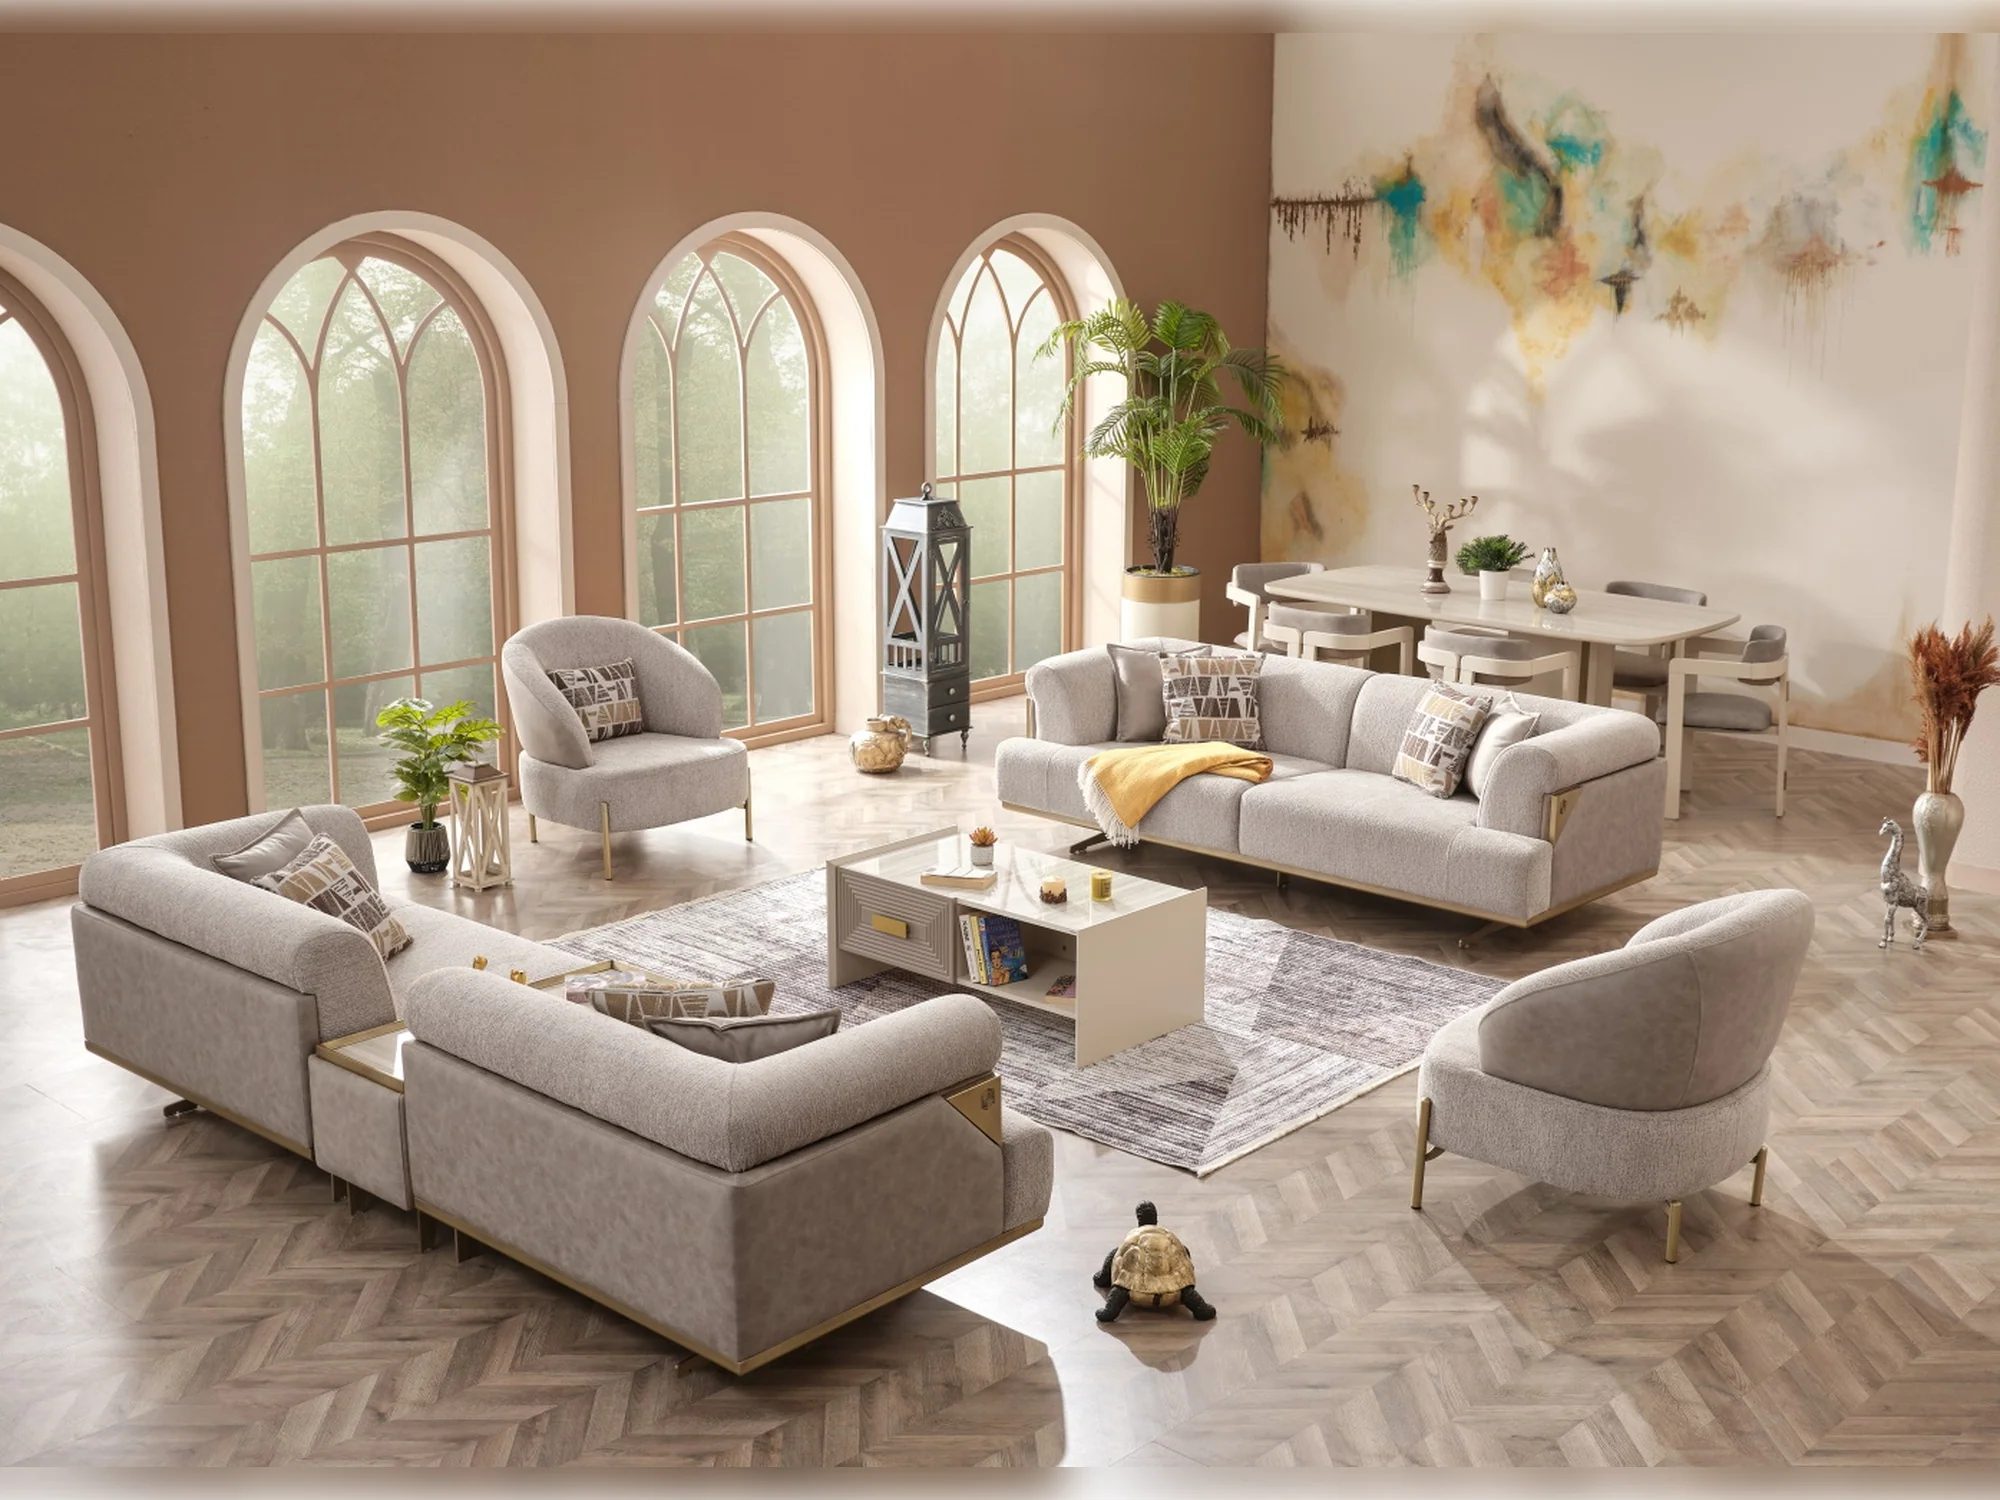

In [ ]:
input_image

In [ ]:
newsize = (224, 224)
input_image = input_image.resize(newsize)
# Shows the image in image viewer
input_image.show()

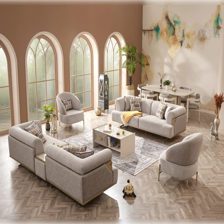

In [ ]:
input_image

In [ ]:
x = torch.randn(8, 3, 224, 224, requires_grad=True)
if device == 'cuda':
  model2 = model2.to(device)
  x = x.to(device)

traced_model = torch.jit.trace(model2, x)

Image size:  (224, 224)


(3, 224, 224)

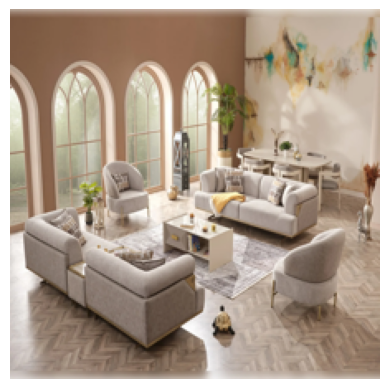

In [ ]:
labels = classes

print("Image size: ", input_image.size)
plt.axis('off')
display_image = plt.imshow(input_image)
image_data = np.array(input_image).transpose(2, 0, 1)
image_data.shape

In [ ]:
input_data = preprocess(image_data)

In [ ]:
input_data.shape

(1, 3, 224, 224)

In [ ]:
start = time.time()
raw_result = session.run([], {input_name: input_data})
end = time.time()
res = postprocess(raw_result)

Final top prediction is: livingroom
Inference time: 165.53 ms
============ Top 5 labels are: ============================
['livingroom', 'toystore', 'children_room', 'museum', 'lobby']


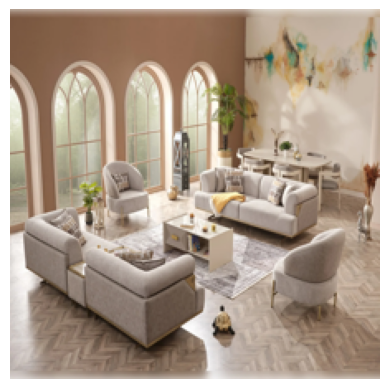

In [ ]:
inference_time = np.round((end - start) * 1000, 2)
idx = np.argmax(res)

print('========================================')
print('Final top prediction is: ' + labels[idx])
print('========================================')

print('========================================')
print('Inference time: ' + str(inference_time) + " ms")
print('========================================')

sort_idx = np.flip(np.squeeze(np.argsort(res)))
print('============ Top 5 labels are: ============================')
print([labels[i] for i in sort_idx[:5].tolist()])
print('===========================================================')

plt.axis('off')
display_image = plt.imshow(input_image)

In [ ]:
type(traced_model)

torch.jit._trace.TopLevelTracedModule

In [ ]:
traced_model(torch.rand(8, 3, 224, 224).to(device)).shape

torch.Size([8, 67])

In [ ]:
!pip install openvino

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 MB 17.3 MB/s eta 0:00:00


In [ ]:
filename = '/content/livingroom.jpg' # change to your filename
from torchvision import models, datasets, transforms as T
import torch
from PIL import Image
import numpy as np

input_image = Image.open(filename)
preprocess = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)
print("GPU Availability: ", torch.cuda.is_available())
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')

GPU Availability:  False


## Inference with ONNX Runtime

In [ ]:
# Inference with ONNX Runtime
import onnxruntime
from onnx import numpy_helper
import time

session_fp32 = onnxruntime.InferenceSession("resnet50dindoorcvpr.onnx", providers=['CPUExecutionProvider'])
# session_fp32 = onnxruntime.InferenceSession("resnet50.onnx", providers=['CUDAExecutionProvider'])
# session_fp32 = onnxruntime.InferenceSession("resnet50.onnx", providers=['OpenVINOExecutionProvider'])

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


def run_sample(session, categories, inputs):
    latency = []
    start = time.time()
    input_arr = inputs.cpu().detach().numpy()
    ort_outputs = session.run([], {'input':input_arr})[0]
    latency.append(time.time() - start)
    output = ort_outputs.flatten()
    output = softmax(output) # this is optional
    top5_catid = np.argsort(-output)[:5]
    for catid in top5_catid:
        print(categories[catid], output[catid])
    return ort_outputs, latency

ort_output, latency = run_sample(session_fp32, classes, input_batch)
print("ONNX Runtime CPU/GPU/OpenVINO Inference time = {} ms".format(format(sum(latency) * 1000 / len(latency), '.2f')))

livingroom 0.5926021
bedroom 0.046017434
bathroom 0.044285994
cloister 0.031701
children_room 0.02859209
ONNX Runtime CPU/GPU/OpenVINO Inference time = 128.56 ms


In [ ]:
input_batch.shape

torch.Size([1, 3, 224, 224])

## Inference with OpenVINO

In [ ]:
#Inference with OpenVINO
from openvino.runtime import Core

ie = Core()
onnx_model_path = "./resnet50dindoorcvpr.onnx"
model_onnx = ie.read_model(model=onnx_model_path)
compiled_model_onnx = ie.compile_model(model=model_onnx, device_name="CPU")

# inference
output_layer = next(iter(compiled_model_onnx.outputs))

latency = []
input_arr = input_batch.cpu().detach().numpy()
inputs = {'input':input_arr}
start = time.time()
request = compiled_model_onnx.create_infer_request()
output = request.infer(inputs=inputs)

outputs = request.get_output_tensor(output_layer.index).data
latency.append(time.time() - start)

print("OpenVINO CPU Inference time = {} ms".format(format(sum(latency) * 1000 / len(latency), '.2f')))

print("***** Verifying correctness *****")
for i in range(2):
    print('OpenVINO and ONNX Runtime output {} are close:'.format(i), np.allclose(ort_output, outputs, rtol=1e-05, atol=1e-04))

OpenVINO CPU Inference time = 421.85 ms
***** Verifying correctness *****
OpenVINO and ONNX Runtime output 0 are close: True
OpenVINO and ONNX Runtime output 1 are close: True
